#**Customer Churn Prediction using Naive Bayes**#

In [1]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [4]:
X = df.drop('Churn', axis=1)
y = df['Churn']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)


In [6]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Naive Bayes Model Performance:
Accuracy: 0.7159
Precision: 0.3717
Recall: 0.9091
F1-Score: 0.5277


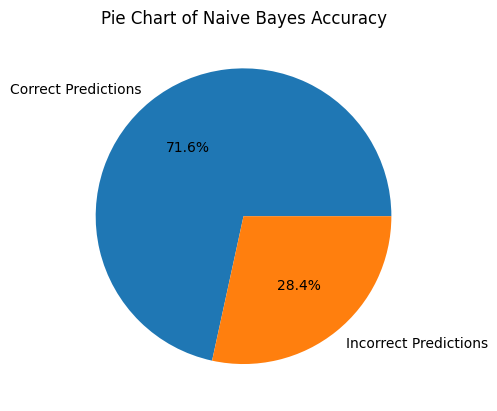

In [7]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']

# Define pie chart slice values based on accuracy
pie_chart_slice_values = [accuracy, 1 - accuracy]

# Create a pie chart of the accuracy
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Naive Bayes Accuracy")
plt.show()

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nb_model = SVC(kernel='rbf')


In [9]:
# Train the SVM model on the scaled data
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = nb_model.predict(X_test_scaled)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8968


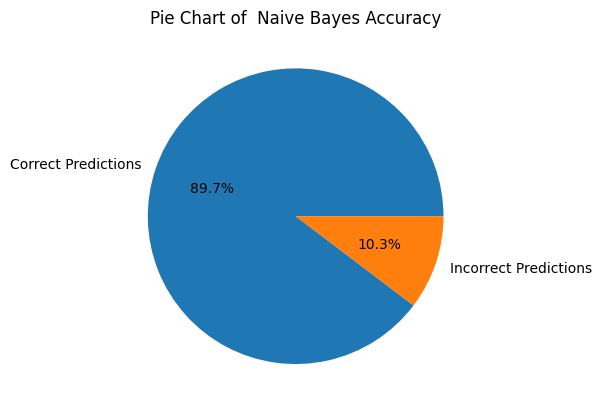

In [11]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']

# Define pie chart slice values based on accuracy
pie_chart_slice_values = [accuracy, 1 - accuracy]

# Create a pie chart of the accuracy
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of  Naive Bayes Accuracy")
plt.show()

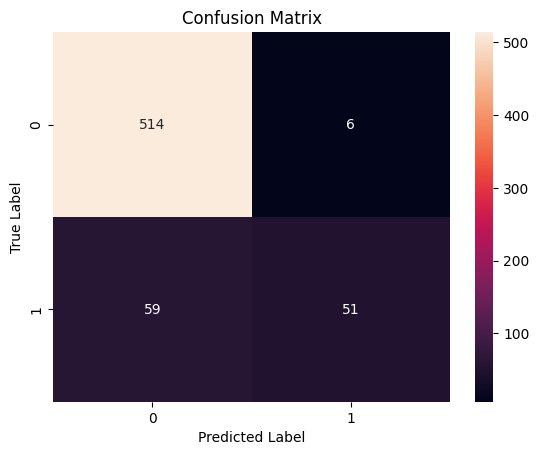

In [12]:
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()